1. Import libraries 

In [2]:
# Ensure the scripts directory is in your Python path
import sys
import os
sys.path.append(os.path.abspath('../script'))

# Import the necessary class from data_preprocessing.py
from data_preprocessing import DataPreprocessor

# Initialize the preprocessor
preprocessor = DataPreprocessor(file_path="../src/data/MachineLearningRating_v3.txt", delimiter="|")

In [3]:
# Load the data
preprocessor.load_data()

e:\OnlineClass\AIM\Car-Insurance-Analytics-and-Modeling\script\data_preprocessing.py:26: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path, delimiter=self.delimiter)
2025-03-12 12:52:40,037 - INFO - Data loaded successfully.


2. Data Summarization

Get a quick overview of the dataset, including column names, data types, and descriptive statistics

In [4]:
# Summarize the data
preprocessor.summarize_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

2025-03-12 12:53:55,429 - INFO - Data summary provided.


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

3. Data Quality Assessment

3.1 Check for Duplicates

Identify any duplicated rows or columns in the dataset:

In [5]:
# Check for duplicates
preprocessor.check_duplicates()

2025-03-12 12:54:10,113 - INFO - Checked duplicates. Rows: 0, Columns: []


Duplicated rows: 0
Duplicated columns: []


3.2 Handling missing values

In [6]:
# Handle missing values
preprocessor.handle_missing_values()

e:\OnlineClass\AIM\Car-Insurance-Analytics-and-Modeling\script\data_preprocessing.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data['NewVehicle'].fillna(self.data['NewVehicle'].mode()[0], inplace=True)
e:\OnlineClass\AIM\Car-Insurance-Analytics-and-Modeling\script\data_preprocessing.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

3.3 Remove Negative Values

Remove any rows with negative values in TotalPremium or TotalClaims:

In [7]:
# Remove negative values
preprocessor.remove_negative_values()

Negative rows before removal: 291


2025-03-12 12:54:22,993 - INFO - Removed rows with negative values. Total removed: 291


3.4: Remove Whitespace

Trim leading and trailing whitespaces from all string columns in the dataset:

In [8]:
# Remove leading and trailing whitespaces
preprocessor.strip_whitespace()

e:\OnlineClass\AIM\Car-Insurance-Analytics-and-Modeling\script\data_preprocessing.py:88: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.data = self.data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
2025-03-12 12:54:45,416 - INFO - Leading and trailing whitespaces removed.


3.5: Handle Outliers

Call the outlier_handling function to visualize outliers, calculate quantile thresholds, and summarize key statistics for TotalPremium and TotalClaims:

Boxplots for 'TotalPremium' and 'TotalClaims':


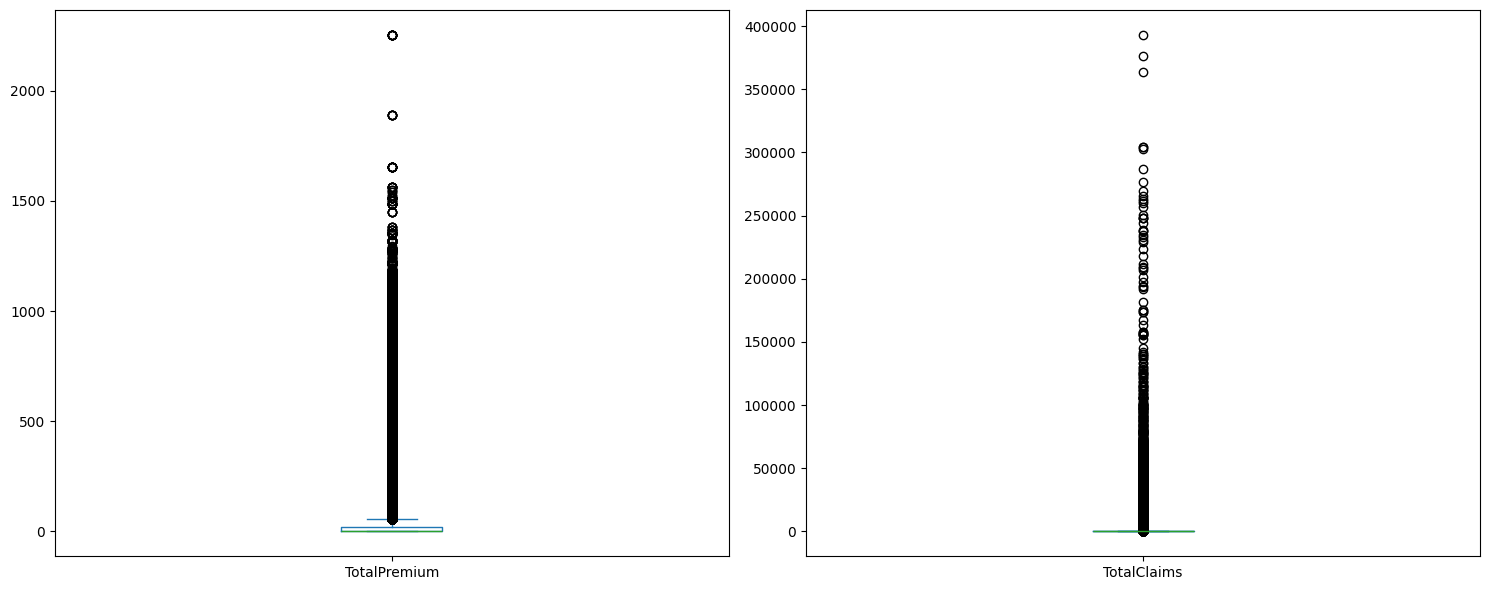

TotalPremium lower quantile (1%): 0.0
TotalPremium upper quantile (99%): 778.698157894737
TotalClaims lower quantile (1%): 0.0
TotalClaims upper quantile (99%): 0.0
Number of rows that would be removed: 12374

Summary of 'TotalClaims':
count    989266.000000
mean         64.513788
std        2374.776864
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      393092.105263
Name: TotalClaims, dtype: float64
95th percentile of 'TotalClaims': 0.0
99.72th percentile of 'TotalClaims': 0.0
Number of values greater than zero in 'TotalClaims': 2760


2025-03-12 12:56:02,011 - INFO - Outlier handling completed.


Number of outliers in 'TotalPremium': 206450
Number of outliers in 'TotalClaims': 2760


In [9]:
# Handle outliers
preprocessor.outlier_handling()

After evaluating both quantile-based and IQR outlier detection methods, it is clear that the unique distribution of TotalClaims—with only 2760 positive values out of 989,266 total values and most values being zero—makes traditional outlier removal unsuitable. Applying these methods would eliminate all meaningful positive claim data, which is critical for analysis. Filtering based on the 99.9th percentile threshold resulted in minimal impact, removing only three rows while retaining all positive claims. Considering these results, it is recommended to keep the dataset as is without applying outlier removal, ensuring the integrity of the data for meaningful insights and modeling. This approach preserves the rare but significant positive claims while addressing the challenges posed by skewness.

4: Save the cleaned data

In [10]:
# Save the cleaned data
preprocessor.save_cleaned_data(save_path="../src/data/cleaned_data.csv")

2025-03-12 12:56:44,802 - INFO - Cleaned data saved to ../src/data/cleaned_data.csv


Cleaned data saved to ../src/data/cleaned_data.csv


5. Check the shape of the dataset

In [11]:
# Check the shape of the dataset
print(preprocessor.data.shape)

(989266, 46)
